<a href="https://colab.research.google.com/github/alptuggurler/CPE312/blob/main/week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1csv/data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [ ]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
y = data.diagnosis.values

In [ ]:
x_data=data.drop(["diagnosis"],axis=1)

In [ ]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("decision score :",dt.score(x_test,y_test))

decision score : 0.9069767441860465


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
print("random forest score :",rf.score(x_test,y_test))

random forest score : 0.9534883720930233


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1csv/car_evaluation.csv')

In [ ]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
col_names=["buying","maint","door","persons","lug_boot","safety","class"]
data.columns=col_names
col_names

['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   door      1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
for col in col_names:
    print(data[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: door, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
data["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
data.isnull().sum()

buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
x=data.drop(["class"],axis=1)
y=data["class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((1157, 6), (570, 6))

In [ ]:
x_train.dtypes

buying      object
maint       object
door        object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
x_train.head()

,buying,maint,door,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=["buying","maint","door","persons","lug_boot","safety",])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("model accuracy n_estimator=10: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

model accuracy n_estimator=10: 0.9474


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(x_train,y_train)
y_pred_100 = rfc_100.predict(x_test)
print("model accuracy n_estimator=100: {0:0.4f}".format(accuracy_score(y_test,y_pred_100)))

model accuracy n_estimator=100: 0.9649


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
classes  = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:',nClasses)
print('output classes:',classes)

Total number of outputs: 10
output classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
label_dict={
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

Text(0.5, 1.0, 'Label:frog)')
Text(0.5, 1.0, '(Label:cat)')


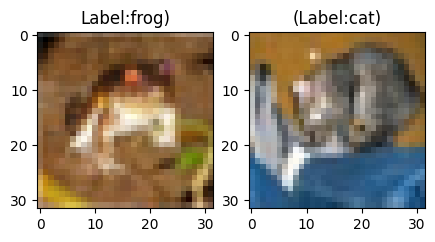

In [ ]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img = np.reshape(x_train[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("Label:"+str(label_dict[y_train[0][0]]) + ")"))

plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label:"+str(label_dict[y_test[0][0]]) + ")"))

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
x_train=x_train/255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_flat=x_train.reshape(-1,3072)
feat_cols=['pixel'+str(i)for i in range(x_train_flat.shape[1])]
df_cifar=pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label']=y_train

In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [ ]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalcomponent_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
df_cifar.shape

(50000, 3073)

In [ ]:
principal_cifar_Df=pd.DataFrame(data=principalcomponent_cifar,
                               columns=['principal component 1','principal component 2'])
principal_cifar_Df['y']=y_train

In [ ]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [ ]:
pca_cifar.explained_variance_ratio_

array([0.2907663 , 0.11253144])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

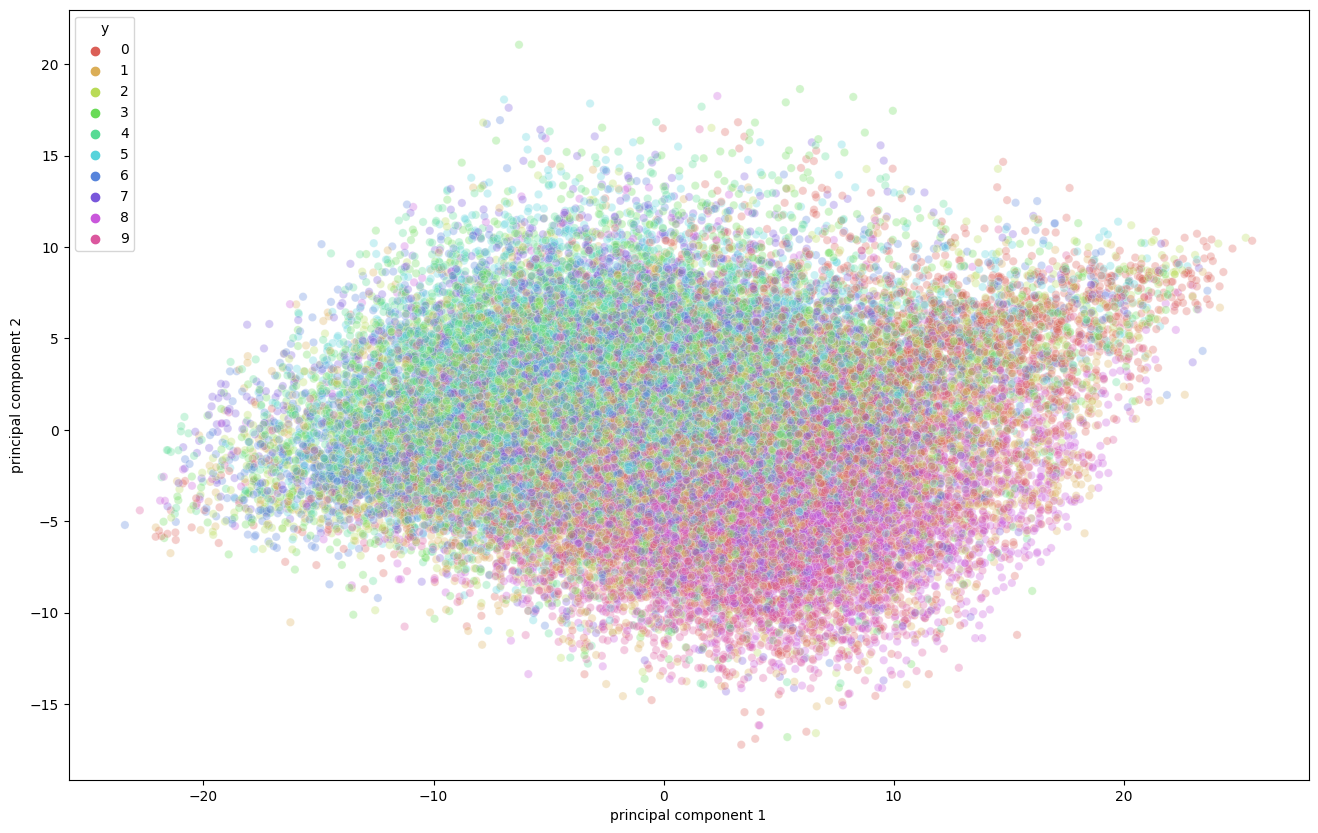

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1",y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls",10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
            )

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
data=iris.data
feature_names = iris.feature_names
y=iris.target
df=pd.DataFrame(data,columns=feature_names)
df["sinif"]=y
x=data
from sklearn.decomposition import PCA
pca=PCA(n_components = 2 , whiten = True)
pca.fit(x)
x_pca=pca.transform(x)
print("variance ratio",pca.explained_variance_ratio_)
print("sum",sum(pca.explained_variance_ratio_))

variance ratio [0.92461872 0.05306648]
sum 0.977685206318795


In [ ]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     sinif  
0        0  
1

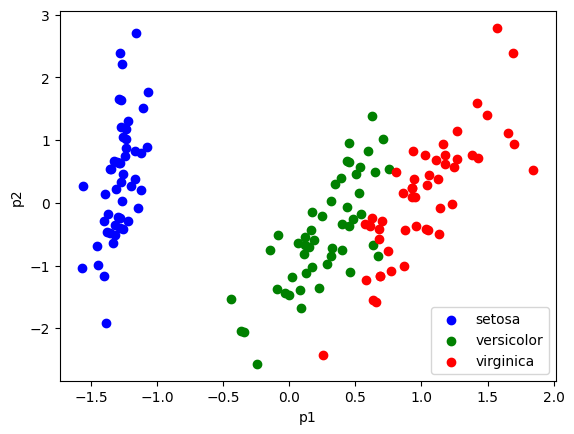

In [ ]:
df["p1"] = x_pca[:,0]
df["p2"]=x_pca[:,1]
color=["blue","green","red"]
import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif==each],df.p2[df.sinif==each],color=color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()